In [6]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [19]:
class ResultMaster() :
    def __init__(self, _dirName, _islandNum) :
        # 各種変数

        #評価用データに対する各種誤識別率
        self.tstMissRates_Global = []
        self.tstMissRates_Local = []
        self.tstMissRates_Single = []
        #学習用データに対する各種誤識別率
        self.traMissRates_Global = []
        self.traMissRates_Local = []
        self.traMissRates_Single = []

        #弱識別器の情報
        self.Global_NonDomi = []
        self.Global_Single = []
        self.Local_NonDomi = []
        self.Local_Single = []
        self.BestSingle = []

        self.sep = '/'
        self.directory = '.' + self.sep + _dirName

        self.islandNum = _islandNum

    # 各種誤識別率 読込
    def getMissRates(self) :
        dirName = self.directory + self.sep + 'ensemble' + self.sep

        # tst ensembleGlobal
        fileName = 'tst_missRates_ensembleGlobal.txt'
        path = '' + dirName + fileName
        readMissRate(path, self.tstMissRates_Global)

        # tst ensembleLocal
        fileName = 'tst_missRates_ensembleLocal.txt'
        path = '' + dirName + fileName
        readMissRate(path, self.tstMissRates_Local)

        # tra ensembleGlobal
        fileName = 'tra_missRates_ensembleGlobal.txt'
        path = '' + dirName + fileName
        readMissRate(path, self.traMissRates_Global)

        # tra ensembleLocal
        fileName = 'tra_missRates_ensembleLocal.txt'
        path = '' + dirName + fileName
        readMissRate(path, self.traMissRates_Local)

        # tst Single
        fileName = 'tst_missRates_SingleClassifier.txt'
        path = '' + dirName + fileName
        i = 0
        f = open(path, 'r')
        for line in f:
            self.tstMissRates_Single.append([])
            self.tstMissRates_Single[i].append( line[:-1].split(' ')[0] + line[:-1].split(' ')[1]) # repeatNum + crossValidation
            self.tstMissRates_Single[i].append( line[:-1].split(' ')[2] ) # 単一識別器の評価用データに対する誤識別率
            i += 1
        f.close()
        # float変換
        for i in range(len(self.tstMissRates_Single)):
            self.tstMissRates_Single[i] =  [float(s) for s in self.tstMissRates_Single[i]]

        # tra Single
        fileName = 'tra_missRates_SingleClassifier.txt'
        path = '' + dirName + fileName
        i = 0
        f = open(path, 'r')
        for line in f:
            self.traMissRates_Single.append([])
            self.traMissRates_Single[i].append( line[:-1].split(' ')[0] + line[:-1].split(' ')[1]) # repeatNum + crossValidation
            self.traMissRates_Single[i].append( line[:-1].split(' ')[2] ) # 単一識別器の学習用データに対する誤識別率
            i += 1
        f.close()
        # float変換
        for i in range(len(self.traMissRates_Single)):
            self.traMissRates_Single[i] =  [float(s) for s in self.traMissRates_Single[i]]

    # 非劣解集合 read関数
    def readRuleSet_NonDomi(self, _fileName, _list) :
        dirName = self.directory + self.sep + 'ensemble' + self.sep + 'ruleset' + self.sep

        for i in range(10) : #繰り返し回数 repeatNum * crossValidation + crossValidation
            rr = int(i / 10)
            cc = i % 10
            fileName = _fileName
            fileName += self.sep + 'rules_' + str(rr) + '_' + str(cc) + '.txt'
            path = '' + dirName + fileName
            _list.append([]) # rr ccの個数 list を生成

            f = open(path, 'r')
            flg = 0
            j = -1
            for line in f :
                if '---' in line :
                    _list[i].append([])
                    ruleNum = 0
                    ruleset_i = 0
                    flg = 0
                    j += 1
                elif flg == 0 :
                    _list[i][j].append({})
                    _list[i][j][0].setdefault( "island_i", int(line[:-1].split(' ')[0]))
                    _list[i][j][0].setdefault( "basic_i", int(line[:-1].split(' ')[1]))
                    _list[i][j][0].setdefault( "fitness0", float(line[:-1].split(' ')[2]))
                    _list[i][j][0].setdefault( "fitness1", float(line[:-1].split(' ')[3]))
                    ruleNum = float(line[:-1].split(' ')[3])
                    Ndim = float(line[:-1].split(' ')[4])
                    flg = 1
                else :
                    _list[i][j].append({})
                    _list[i][j][ruleset_i + 1].setdefault("rule", [])
                    for rule_i in range(int(Ndim)) :
                        _list[i][j][ruleset_i + 1]["rule"].append(int(line[:-1].split(' ')[rule_i]))
                    _list[i][j][ruleset_i + 1].setdefault("conClass", int(line[:-1].split(' ')[int(Ndim)]))
                    _list[i][j][ruleset_i + 1].setdefault("Cf", line[:-1].split(' ')[int(Ndim) + 1])
                    ruleset_i += 1

    # 単一弱識別器 read関数
    def readRuleSet_Single(self, _fileName, _list) :
        dirName = self.directory + self.sep + 'ensemble' + self.sep + 'ruleset' + self.sep

        for i in range(10) : #繰り返し回数 repeatNum * crossValidation + crossValidation
            rr = int(i / 10)
            cc = i % 10
            fileName = _fileName
            fileName += self.sep + 'rules_' + str(rr) + '_' + str(cc) + '.txt'
            path = '' + dirName + fileName
            _list.append([]) # rr ccの個数 list を生成

            f = open(path, 'r')
            flg = 0
            j = -1
            for line in f :
                if '---' in line :
                    _list[i].append([])
                    ruleNum = 0
                    ruleset_i = 0
                    flg = 0
                    j += 1
                elif flg == 0 :
                    _list[i][j].append({})
                    _list[i][j][0].setdefault( "island_i", int(line[:-1].split(' ')[0]))
                    _list[i][j][0].setdefault( "fitness0", float(line[:-1].split(' ')[1]))
                    _list[i][j][0].setdefault( "fitness1", float(line[:-1].split(' ')[2]))
                    ruleNum = float(line[:-1].split(' ')[2])
                    Ndim = float(line[:-1].split(' ')[3])
                    flg = 1
                else :
                    _list[i][j].append({})
                    _list[i][j][ruleset_i + 1].setdefault("rule", [])
                    for rule_i in range(int(Ndim)) :
                        _list[i][j][ruleset_i + 1]["rule"].append(int(line[:-1].split(' ')[rule_i]))
                    _list[i][j][ruleset_i + 1].setdefault("conClass", int(line[:-1].split(' ')[int(Ndim)]))
                    _list[i][j][ruleset_i + 1].setdefault("Cf", line[:-1].split(' ')[int(Ndim) + 1])
                    ruleset_i += 1

    # best単一識別器 read関数
    def readRuleSet_BestSingle(self, _fileName, _list) :
        dirName = self.directory + self.sep + 'ensemble' + self.sep + 'ruleset' + self.sep

        for i in range(10) : #繰り返し回数 repeatNum * crossValidation + crossValidation
            rr = int(i / 10)
            cc = i % 10
            fileName = _fileName
            fileName += self.sep + 'rules_' + str(rr) + '_' + str(cc) + '.txt'
            path = '' + dirName + fileName
            _list.append([]) # rr ccの個数 list を生成

            f = open(path, 'r')
            flg = 0
            for line in f :
                if '---' in line :
                    ruleNum = 0
                    ruleset_i = 0
                    flg = 0
                elif flg == 0 :
                    _list[i].append({})
                    _list[i][0].setdefault( "fitness0", float(line[:-1].split(' ')[0]))
                    _list[i][0].setdefault( "fitness1", float(line[:-1].split(' ')[1]))
                    ruleNum = float(line[:-1].split(' ')[1])
                    Ndim = float(line[:-1].split(' ')[2])
                    flg = 1
                else :
                    _list[i].append({})
                    _list[i][ruleset_i + 1].setdefault("rule", [])
                    for rule_i in range(int(Ndim)) :
                        _list[i][ruleset_i + 1]["rule"].append(int(line[:-1].split(' ')[rule_i]))
                    _list[i][ruleset_i + 1].setdefault("conClass", int(line[:-1].split(' ')[int(Ndim)]))
                    _list[i][ruleset_i + 1].setdefault("Cf", line[:-1].split(' ')[int(Ndim) + 1])
                    ruleset_i += 1

    # ピッツバーグ個体群 (識別器) 情報 読込
    def getRuleSet(self) :
        self.readRuleSet_NonDomi('Global_NonDomi', self.Global_NonDomi)
        self.readRuleSet_NonDomi("Local_NonDomi" , self.Local_NonDomi)
        self.readRuleSet_Single('Global_Single', self.Global_Single)
        self.readRuleSet_Single('Local_Single', self.Local_Single)
        self.readRuleSet_BestSingle('SingleBestClassifier', self.BestSingle)

    # 多目的空間における全ての弱識別器の可視化
    #     各CVの弱識別器集合を引数として与える
    def showNonDomiAllPop(self, _list) :
        fig_nonDomi = plt.figure(figsize=(10, 10))
        axes_0 = fig_nonDomi.add_subplot(111)
#         axes_0.set_title("NonDomination All Basic Classifiers")

        fitnessX = []
        fitnessY = []
        for basic in _list :
            fitnessX.append(basic[0]["fitness0"])
            fitnessY.append(basic[0]["fitness1"])
        popNum = len(fitnessX)
        axes_0.scatter(fitnessX, fitnessY, s=100, linewidths=1, edgecolors='black', label="popSize : " + str(popNum))

        axes_0.set_xlabel("Error Rate")
        axes_0.set_ylabel("The Number of Rules")
        axes_0.legend()
#         axes_0.set_xlim([0.0, 100.0])
        axes_0.set_ylim([0, 65])
        axes_0.tick_params(axis='both', direction='in', bottom=True, top=True, left=True, right=True)
        axes_0.tick_params(axis='both', which='major', length=6)
        
        return fig_nonDomi

    # 多目的空間における各島の弱識別器の可視化
    #     各CVの弱識別器集合を引数として与える
    def showNonDomiIslandPop(self, _list) :
        colors = ['r', 'g', 'b', 'y', 'm']
        markers = ['o', '^', 's', 'v', 'd']
    
        fig_nonDomi = plt.figure(figsize=(5, 5))
        axes_0 = fig_nonDomi.add_subplot(111)
#         axes_0.set_title("NonDomination Basic Classifiers from Each Islands")


        for i in range(self.islandNum) :
            fitnessX = []
            fitnessY = []
            for basic in _list :
                if basic[0]["island_i"] == i :
                    fitnessX.append(basic[0]["fitness0"])
                    fitnessY.append(basic[0]["fitness1"])
            popNum = len(fitnessX)
            axes_0.scatter(fitnessX, fitnessY, s=100, c=colors[i], linewidths=1, edgecolors='black', label="island" + str(i) + " : " + str(popNum))

        axes_0.set_xlabel("Error Rate")
        axes_0.set_ylabel("The Number of Rules")
        axes_0.legend()
        axes_0.set_xlim([0.0, 100.0])
        axes_0.set_ylim([0, 50])
        axes_0.tick_params(axis='both', direction='in', bottom=True, top=True, left=True, right=True)
        axes_0.tick_params(axis='both', which='major', length=6)
        
        return fig_nonDomi
        
    # 多目的空間における指定した島の弱識別器の可視化
    #     各CVの弱識別器集合を引数として与える
    def showNonDomiEspeciallyIslandPop(self, _list, _island_i) :
        fig_nonDomi = plt.figure(figsize=(10, 10))
        axes_0 = fig_nonDomi.add_subplot(111)
#         axes_0.set_title("NonDomination Basic Classifiers from Each Islands")

        
        fitnessX = []
        fitnessY = []
        for basic in _list :
             if basic[0]["island_i"] == _island_i :
                fitnessX.append(basic[0]["fitness0"])
                fitnessY.append(basic[0]["fitness1"])
        popNum = len(fitnessX)
        axes_0.scatter(fitnessX, fitnessY, s=100, linewidths=1, edgecolors='black', label="island" + str(_island_i) + " : " + str(popNum))

        axes_0.set_xlabel("Error Rate")
        axes_0.set_ylabel("The Number of Rules")
        axes_0.legend()
#         axes_0.set_xlim([0.0, 100.0])
        axes_0.set_ylim([0, 65])
        axes_0.tick_params(axis='both', direction='in', bottom=True, top=True, left=True, right=True)
        axes_0.tick_params(axis='both', which='major', length=6)
        
        return fig_nonDomi


In [20]:
# 誤識別率 read関数
def readMissRate(_path, _list) :
    i = 0
    f = open(_path, 'r')
    for line in f:
        _list.append([])
        _list[i].append( line[:-1].split(' ')[0]) # repeatNum
        _list[i].append( line[:-1].split(' ')[1]) # crossValidation
        _list[i].append( line[:-1].split(' ')[2]) # 単一な弱識別器 単純多数決
        _list[i].append( line[:-1].split(' ')[3]) # 単一な弱識別器 サブデータ重み多数決
        _list[i].append( line[:-1].split(' ')[4]) # 単一な弱識別器 全データ重み多数決
        _list[i].append( line[:-1].split(' ')[5]) # 非劣解集合 島統合 単純多数決
        _list[i].append( line[:-1].split(' ')[6]) # 非劣解集合 島統合 サブデータ重み多数決
        _list[i].append( line[:-1].split(' ')[7]) # 非劣解集合 島統合 全データ重み多数決
        _list[i].append( line[:-1].split(' ')[8]) # 非劣解集合 島ごと個別 単純多数決
        _list[i].append( line[:-1].split(' ')[9]) # 非劣解集合 島ごと個別 サブデータ重み多数決
        _list[i].append( line[:-1].split(' ')[10]) # 非劣解集合 島ごと個別 全データ重み多数決
        i += 1
    f.close()
    # float変換
    for i in range(len(_list)):
        _list[i] =  [float(s) for s in _list[i]]


In [21]:
island2_overFit_satimage = ResultMaster('island2_overFit_satimage_00_09', 2)
island5_overFit_satimage = ResultMaster('island5_overFit_satimage', 5)
island5_interval_satimage = ResultMaster('island5_interval50_satimage', 5)

island2_overFit_satimage.getMissRates()
island2_overFit_satimage.getRuleSet()

island5_overFit_satimage.getMissRates()
island5_overFit_satimage.getRuleSet()

island5_interval_satimage.getMissRates()
island5_interval_satimage.getRuleSet()

In [43]:
# island2_overFit_phoneme.Global_NonDomi[0]

true


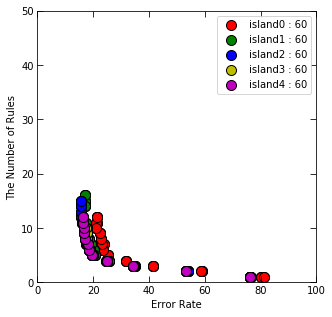

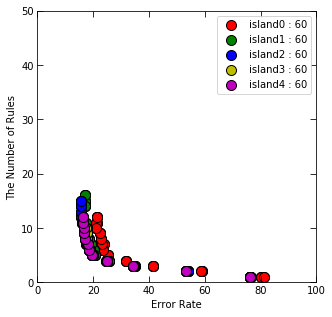

In [30]:
i = 7

# fig = island2_overFit_satimage.showNonDomiIslandPop(island2_overFit_satimage.Global_NonDomi[i])
# fig = island2_overFit_satimage.showNonDomiIslandPop(island2_overFit_satimage.Local_NonDomi[i])
# fig.savefig('overFit_island2_satimage_LocalNonDomi_0_6.png')
# fig = island2_overFit_satimage.showNonDomiIslandPop(island2_overFit_satimage.Global_Single[i])
# fig.savefig('overFit_island2_satimage_GlobalSingle_0_6.png')
# fig = island2_overFit_satimage.showNonDomiIslandPop(island2_overFit_satimage.Local_Single[i])
# fig.savefig('overFit_island2_satimage_LocalSingle_0_6.png')

if(island5_interval_satimage.Global_NonDomi[i] == island5_interval_satimage.Local_NonDomi[i]) :
    print('true')
else :
    print('false')

fig = island5_overFit_satimage.showNonDomiIslandPop(island5_overFit_satimage.Global_NonDomi[i])
fig = island5_overFit_satimage.showNonDomiIslandPop(island5_overFit_satimage.Local_NonDomi[i])
# fig = island5_overFit_satimage.showNonDomiIslandPop(island5_overFit_satimage.Global_Single[i])
# fig.savefig('overFit_island5_satimage_GlobalSingle_0_6.png')
# fig = island5_overFit_satimage.showNonDomiIslandPop(island5_overFit_satimage.Local_Single[i])
# fig.savefig('overFit_island5_satimage_Local_Single_0_6.png')
# fig.savefig('overFit_island5_satimage_Local_0_6.png')
# fig = island5_overFit_satimage.showNonDomiIslandPop(island5_overFit_satimage.Local_NonDomi[i])

# island5_overFit_satimage.showNonDomiIslandPop(island5_overFit_satimage.Global_NonDomi[i])
# fig = island5_interval_satimage.showNonDomiIslandPop(island5_interval_satimage.Global_NonDomi[i])
# fig = island5_interval_satimage.showNonDomiIslandPop(island5_interval_satimage.Global_Single[i])
# fig.savefig('interval50_island5_satimage_GlobalSingle_0_6.png')
# fig = island5_interval_satimage.showNonDomiIslandPop(island5_interval_satimage.Local_Single[i])
# fig.savefig('interval50_island5_satimage_LocalSIngle_0_6.png')
# fig.savefig('interval50_island5_satimage_Local_0_6.png')
# island5_interval_satimage.showNonDomiIslandPop(island5_interval_satimage.Local_Single[i])


In [12]:
def main() :
    island2_overFit_phoneme = ResultMaster('island2_overFit_phoneme_00_09', 2)
    island5_overFit_satimage = ResultMaster('island5_overFit_satimage', 5)
    island5_interval_satimage = ResultMaster('island5_interval50_satimage', 5)
    
    island2_overFit_phoneme.getMissRates()
    island2_overFit_phoneme.getRuleSet()
    
    island5_overFit_satimage
    
    island2_phoneme = ResultMaster('testResult', 2)
    island2_phoneme.getMissRates()
    island2_phoneme.getRuleSet()
    
#     island2_phoneme.showNonDomiAllPop(island2_phoneme.Global_NonDomi[0])
#     island2_phoneme.showNonDomiEspeciallyIslandPop(island3_phoneme.Global_NonDomi[6], 2)
    island2_phoneme.showNonDomiIslandPop(island2_phoneme.Global_NonDomi[4])

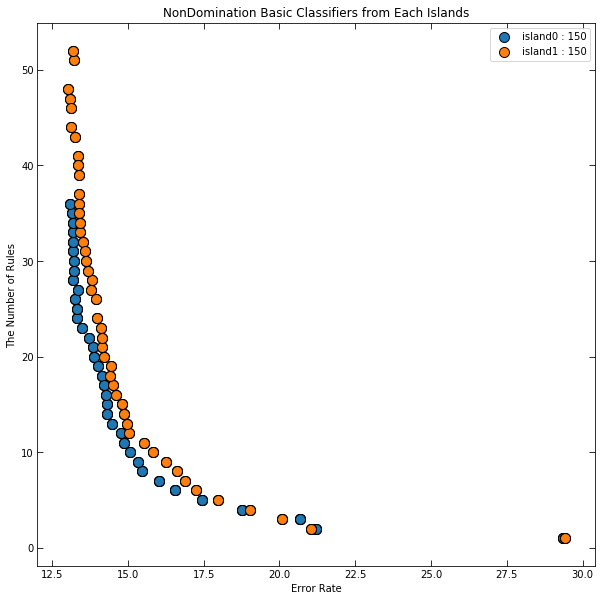

In [19]:
if __name__ == '__main__' :
    main()

In [ ]:
# 多目的空間における指定した島の弱識別器の可視化
#     各CVの弱識別器集合を引数として与える
def showNonDomiEspeciallyIslandPopWithConClass(_list, _island_i, _classNum) :
    fig_nonDomi = plt.figure(figsize=(5, 5))
    axes_0 = fig_nonDomi.add_subplot(111)
#     axes_0.set_title("NonDomination Basic Classifiers from Each Islands")

    colors = ['r', 'g', 'b', 'y', 'm']
    markers = ['o', '^', 's', 'v', 'd']
    fitnessX = []
    fitnessY = []
    for basic in _list :
        if basic[0]["island_i"] == _island_i :
            for i in range(_classNum) :
                basic[0][
            
            
            fitnessX.append(basic[0]["fitness0"])
            fitnessY.append(basic[0]["fitness1"])
    popNum = len(fitnessX)
    axes_0.scatter(fitnessX, fitnessY, s=100, linewidths=1, edgecolors='black', label="island" + str(_island_i) + " : " + str(popNum))

    axes_0.set_xlabel("Error Rate")
    axes_0.set_ylabel("The Number of Rules")
    axes_0.legend()
#     axes_0.set_xlim([0.0, 100.0])
    axes_0.set_ylim([0, 65])
    axes_0.tick_params(axis='both', direction='in', bottom=True, top=True, left=True, right=True)
    axes_0.tick_params(axis='both', which='major', length=6)
        
    return fig_nonDomi

In [17]:
# showNonDomiAllPop(Global_NonDomi[0])
# showNonDomiIslandPop(Global_NonDomi[0], 3)

In [649]:
# 各種平均値計算

def calcAverage(_missRates, rr, cc) :
    
    aveMissRates = []
    for i in range(rr) :
        aveMissRates.append( [] )
        aveMissRates[i] = [0] * 9
        for j in range(cc) :
            for k in range(9) :
                aveMissRates[i][k] += _missRates[int(i*cc + j)][k + 2]
        for j in range(9) :
            aveMissRates[i][j] /= float(cc)
    
    print(aveMissRates)

In [633]:
# calcAverage(traMissRates_Global, 2, 10)